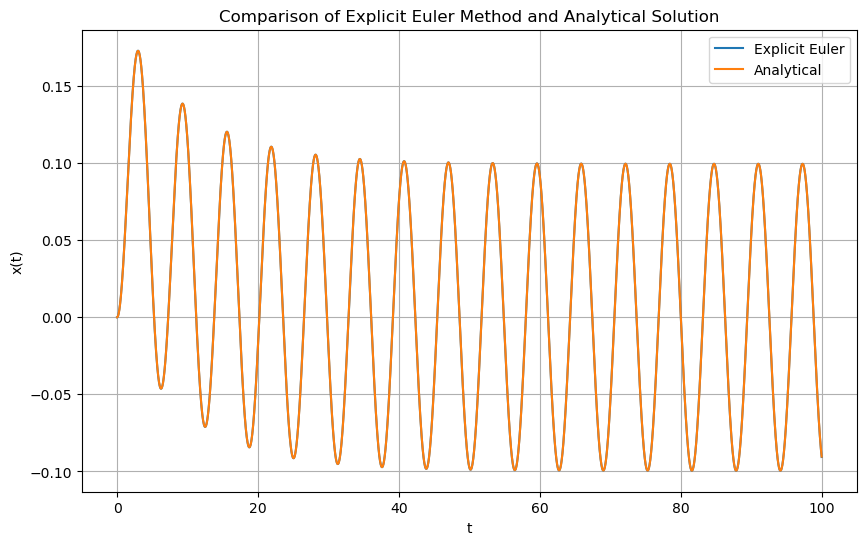

In [19]:
# a

# Consider the ODE dx/dt = a(sin t-x)
# For x(0) = 0, this has the analytical solution:
# x(t) = a/(1+a^2)(e^(-at)-cos t+a sin t)

# Solve the equation using the explicit Euler method and compare with the analytical solution for a = 0.1 on t \in [0,100] using dt = 0.01.

import numpy as np

def analytical_solution(a, t):
    first_factor = a/(1+a**2)
    second_factor = np.exp(-a*t)-np.cos(t) + a*np.sin(t)
    return first_factor * second_factor

def euler_explicit(a, dt, t_max):
    t_values = np.arange(0, t_max + dt, dt)
    x_values = [0.0]  # Initial condition x(0) = 0

    for i in range(1, len(t_values)):
        x_i = x_values[-1]
        t_i = t_values[i]
        x_new = x_i + dt * (a * (np.sin(t_i) - x_i))
        x_values.append(x_new)

    return t_values, x_values

import matplotlib.pyplot as plt

# Parameters
a = 0.1
dt = 0.01
t_max = 100

# Solve using explicit Euler method
t_values_euler, x_values_euler = euler_explicit(a, dt, t_max)

# Calculate the analytical solution
x_values_analytical = analytical_solution(a, t_values_euler)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values_euler, x_values_euler, label='Explicit Euler')
plt.plot(t_values_euler, x_values_analytical, label='Analytical')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Comparison of Explicit Euler Method and Analytical Solution')
plt.legend()
plt.grid(True)
plt.show()


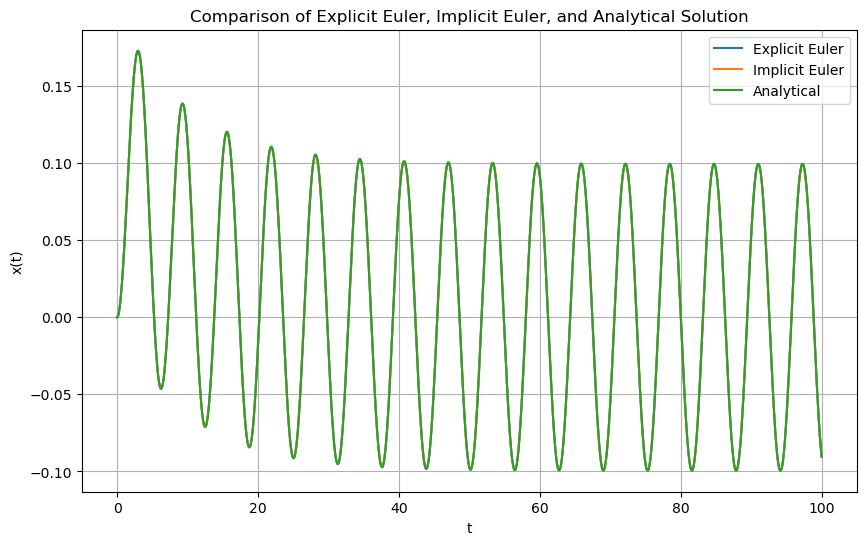

In [20]:
# b
import scipy.optimize as opt

def implicit_euler(a, dt, t_max):
    t_values = np.arange(0, t_max + dt, dt)
    x_values = [0.0]  # Initial condition x(0) = 0

    for i in range(1, len(t_values)):
        t_i = t_values[i]
        # Use scipy's root-finding method to solve the implicit equation
        result = opt.root(lambda x: x - x_values[i - 1] - dt * a * (np.sin(t_i) - x), x_values[i - 1])
        x_new = result.x[0]
        x_values.append(x_new)

    return t_values, x_values
# Parameters
a = 0.1
dt = 0.01
t_max = 100

# Solve using implicit Euler method
t_values_implicit, x_values_implicit = implicit_euler(a, dt, t_max)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values_euler, x_values_euler, label='Explicit Euler')
plt.plot(t_values_implicit, x_values_implicit, label='Implicit Euler')
plt.plot(t_values_euler, x_values_analytical, label='Analytical')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Comparison of Explicit Euler, Implicit Euler, and Analytical Solution')
plt.legend()
plt.grid(True)
plt.show()


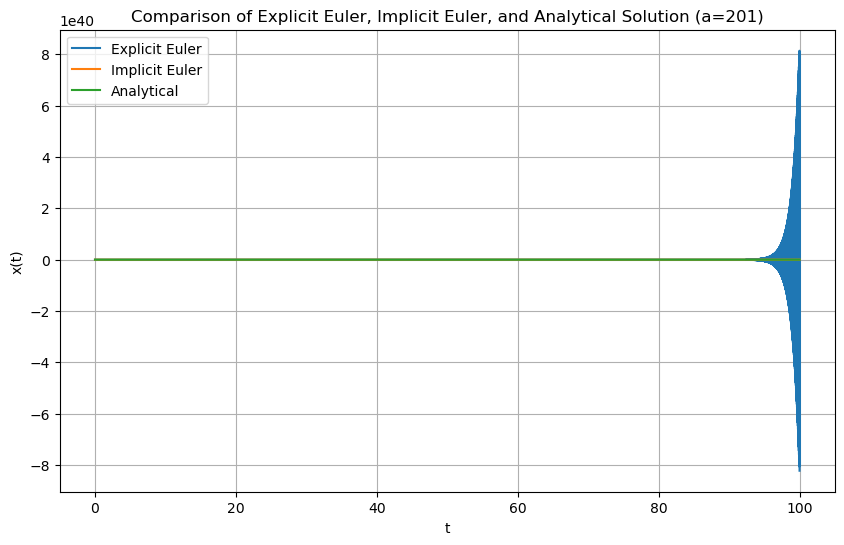

In [21]:
# c

# Parameters
a = 201  # Change this to a larger value, e.g., a = 201, 500, or 1000
dt = 0.01
t_max = 100

# Solve using explicit Euler method
t_values_euler, x_values_euler = euler_explicit(a, dt, t_max)

# Solve using implicit Euler method
t_values_implicit, x_values_implicit = implicit_euler(a, dt, t_max)

# Calculate the analytical solution
x_values_analytical = analytical_solution(a, t_values_euler)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values_euler, x_values_euler, label='Explicit Euler')
plt.plot(t_values_implicit, x_values_implicit, label='Implicit Euler')
plt.plot(t_values_euler, x_values_analytical, label='Analytical')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(f'Comparison of Explicit Euler, Implicit Euler, and Analytical Solution (a={a})')
plt.legend()
plt.grid(True)
plt.show()


